## Checkout with sample

This notebook describes how to perform a checkout operation with ML-Git using samples of a dataset.

The checkout command has three types of sampling options available only for dataset: ```--sample-type=group --seed```,```--sample-type=random --seed```,```--sample-type=range``` . We use [random.sample(population, k)](https://docs.python.org/3.7/library/random.html#random.sample) to return a sample of the size k from the population elements. We use [random.seed()](https://docs.python.org/3.7/library/random.html#random.sample) to set the seed so that the sample generated by `random.sample()` can be reproduced between experiments. We use the [range()](https://docs.python.org/3.7/library/stdtypes.html?highlight=range#range) object to take samples from a given range.

#### Example:

![dataset](../../../dataset.png)



Let's assume that we have a dataset that contains 12 files.

````ml-git datasets checkout computer-vision__images__dataset-ex__22 --sample-type=group --sampling=2:5 --seed=1```` : This command selects 2 files randomly from every group of five files to download.

![group-sample](../../../group-sample.png)

````ml-git datasets checkout computer-vision__images__dataset-ex__22 --sample-type=random --sampling=2:6 --seed=1```` : This command makes a sample = (amount * len (dataset))% frequency ratio, sample = 4, so four files are selected randomly to download.  

![random-sample](../../../random-sample.png)

````ml-git datasets checkout computer-vision__images__dataset-ex__22 --sample-type=range --sampling=2:11:2```` : This command selects the files at indexes generated by `range(start=2, stop=11, step=2)`.

![range-sample](../../../range-sample.png)


#### Notebook state management

Before execute any cell from this notebook, make sure that you have executed all cells from notebook multiple_datasets in same folder.

#### To start using the ml-git api we need to import it into our script, and make sure that we are in correct folder

In [1]:
from ml_git.api import MLGitAPI

In [ ]:
%cd /api_scripts/multiple_datasets_notebook

#### After that, we define some variables that will be used by the script

In [2]:
# The type of entity we are working on
entity = 'datasets'

# Existing tag in our repository
tag = 'peopleFaces'

#### Before using the sample option, we will checkout the entity to check the files contained in the tag

The datapath returned by the function tells us where the entity's data was downloaded. That way we can use the following method to print the files that are in the entity's directory

Downloaded files: 
	datasets/people_faces/data/people_faces/3.jpg


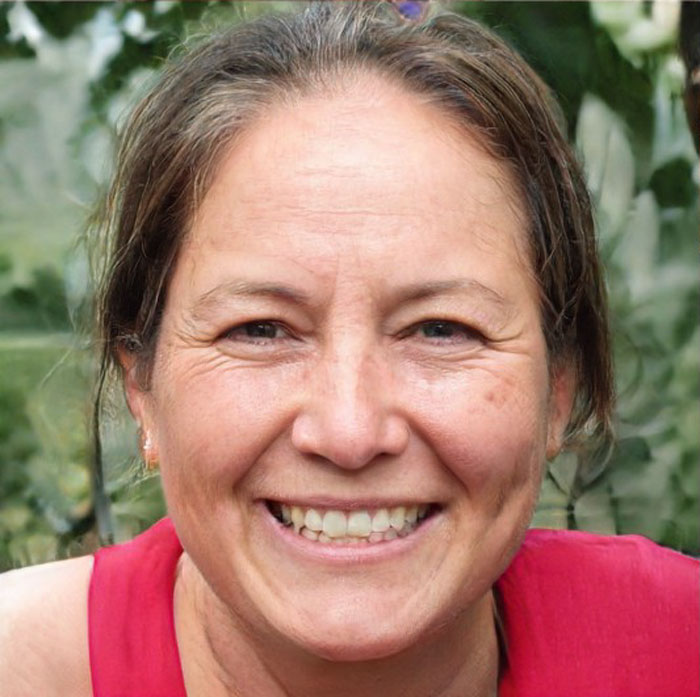

	datasets/people_faces/data/people_faces/4.jpg


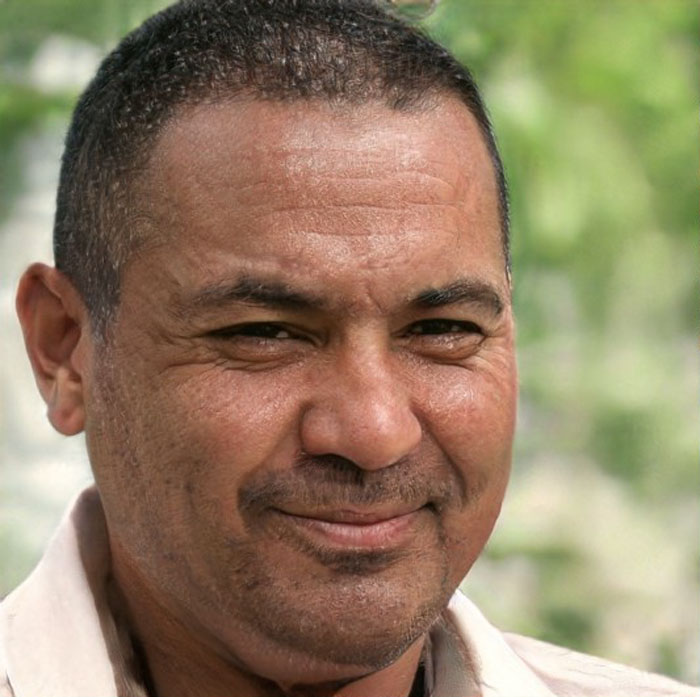

	datasets/people_faces/data/people_faces/8.jpg


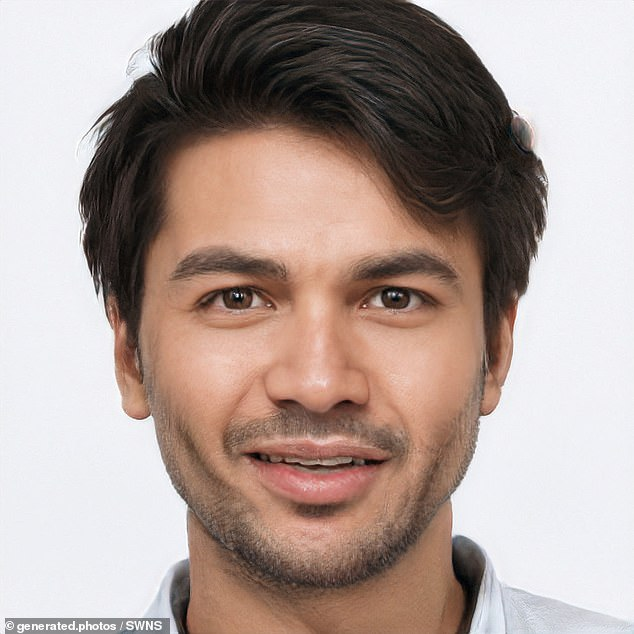

	datasets/people_faces/data/people_faces/5.jpg


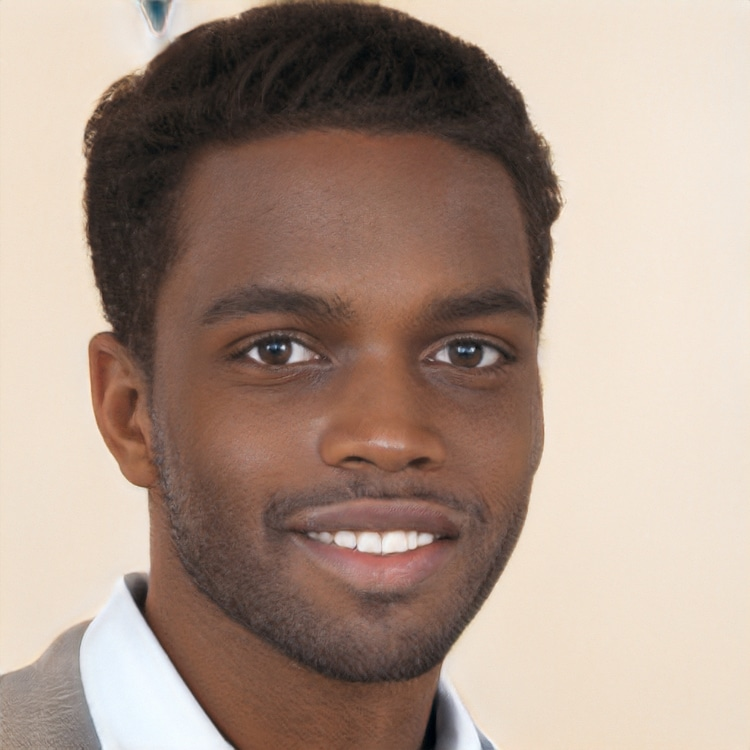

	datasets/people_faces/data/people_faces/1.jpg


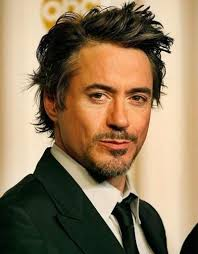

	datasets/people_faces/data/people_faces/9.jpg


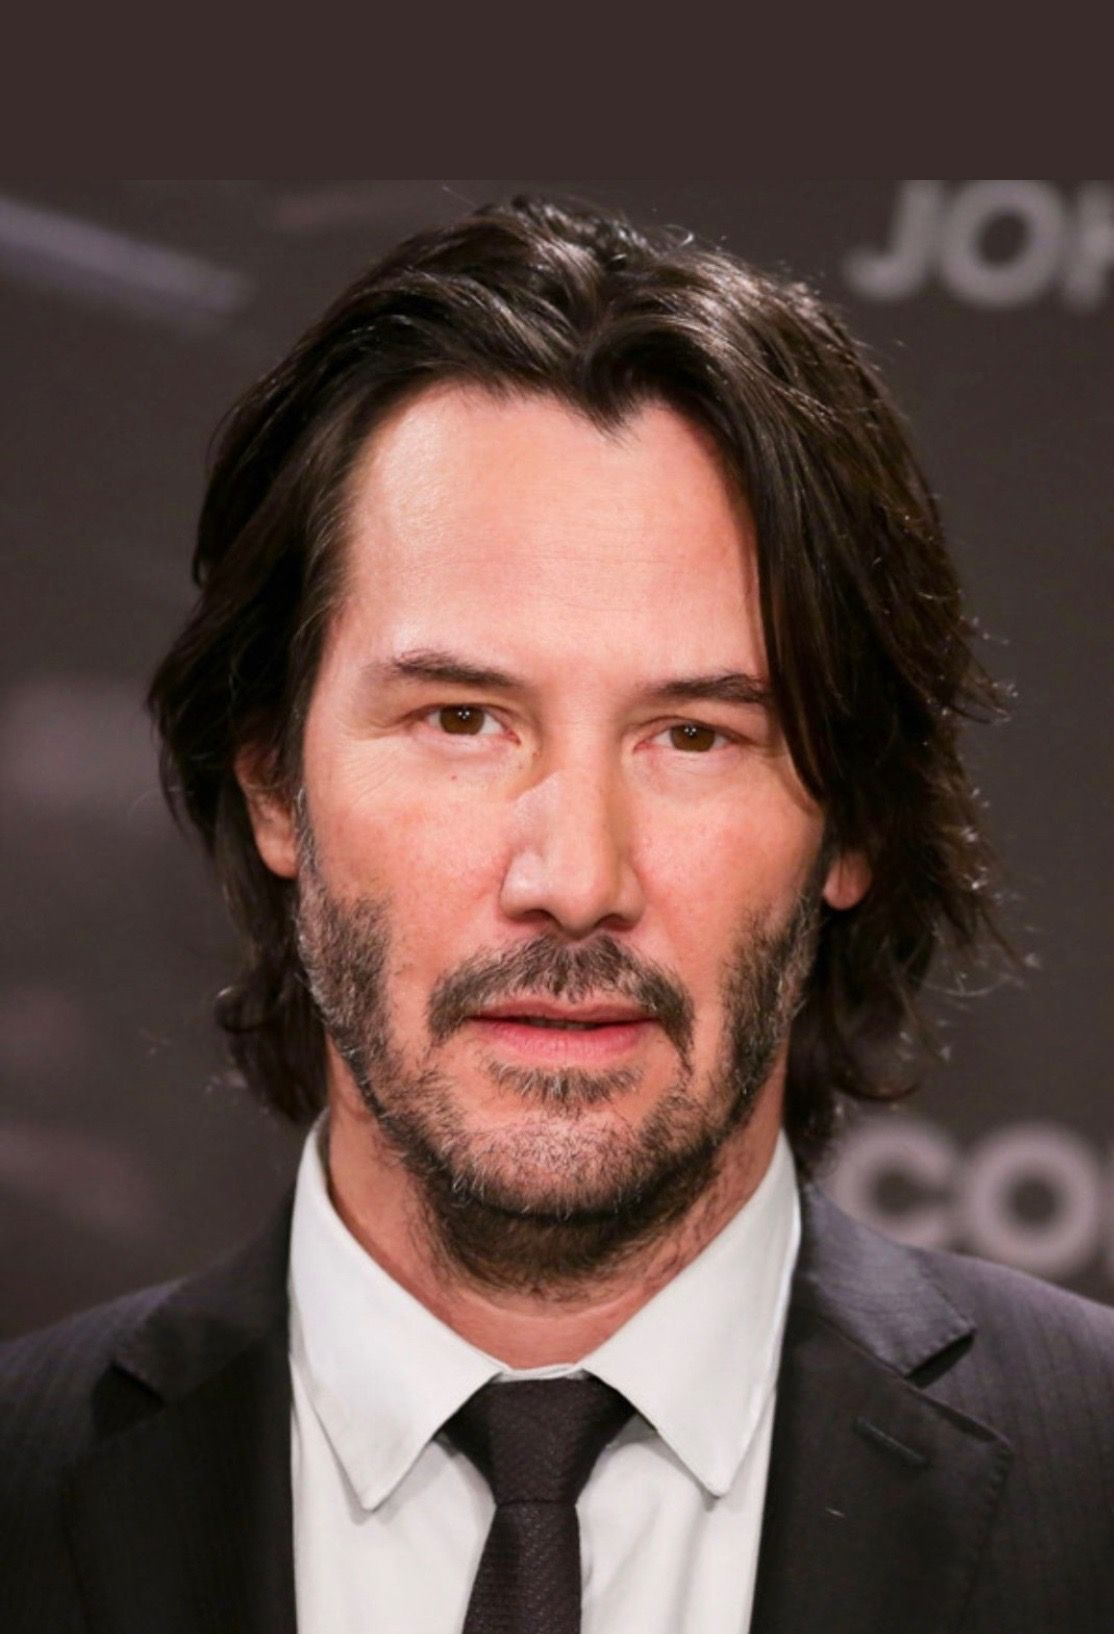

	datasets/people_faces/data/people_faces/10.jpg


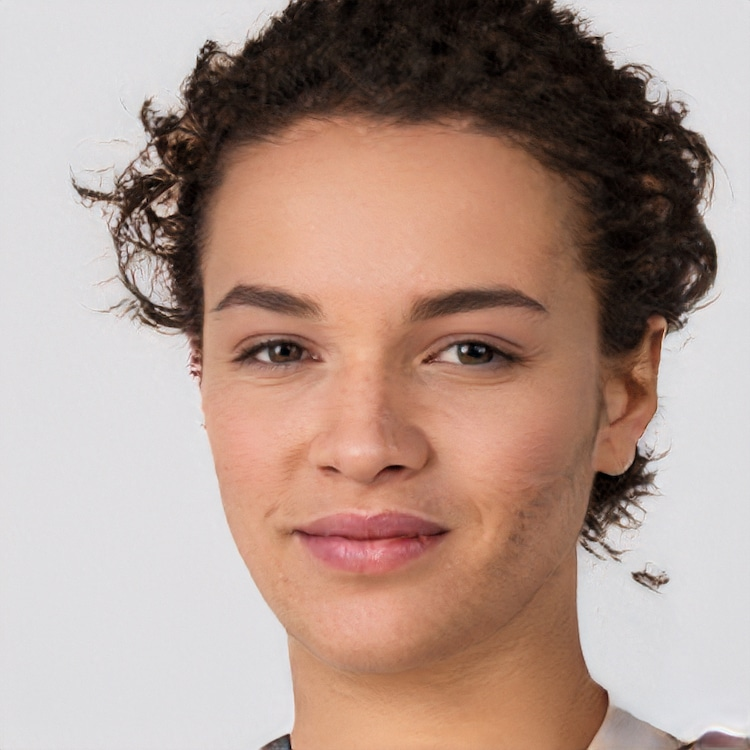

	datasets/people_faces/data/people_faces/7.jpg


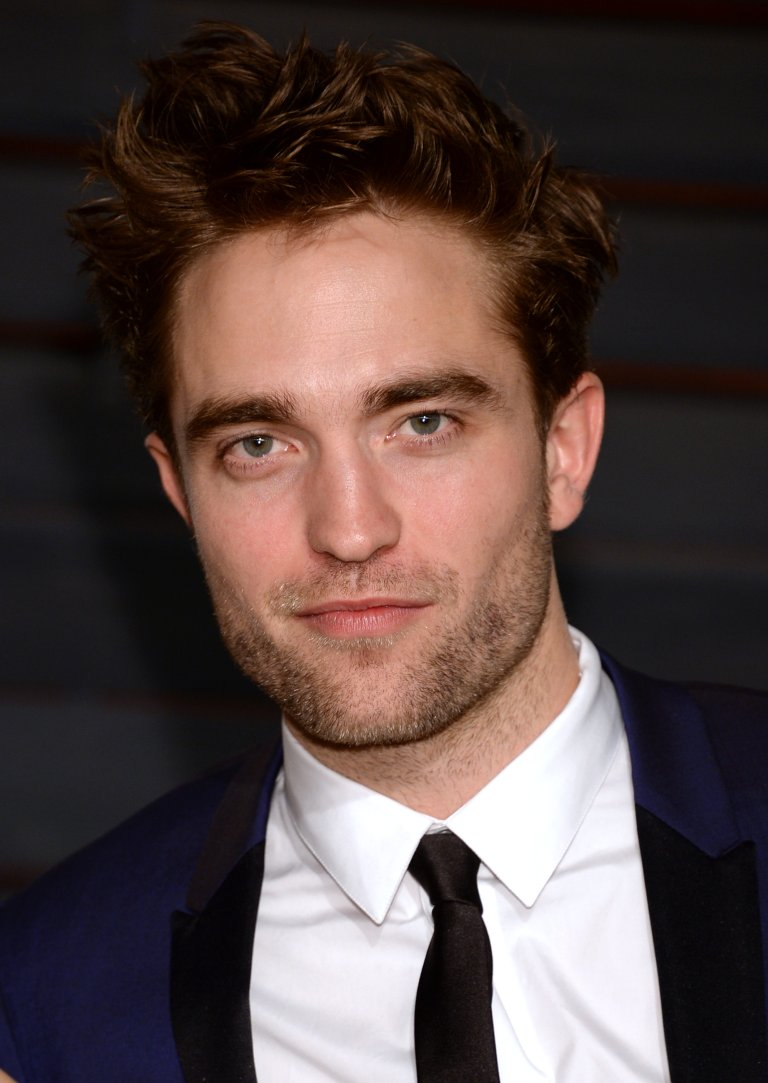

	datasets/people_faces/data/people_faces/6.jpg


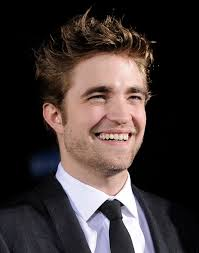

	datasets/people_faces/data/people_faces/2.jpg


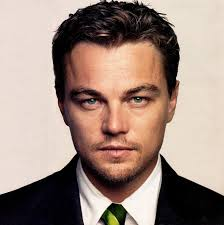

In [3]:
import os
import glob
from IPython.display import Image

data_type = '*.jpg'

def print_files():
    data_path = 'datasets/peopleFaces/data/people_faces'
    folder = os.path.join(data_path, data_type)
    print('Downloaded files: ')
    for imageName in glob.glob(folder):
        print ('\t{}'.format(imageName))
        display(Image(filename=imageName, width = 150, height = 150))

print_files()

#### To be able to checkout the same tag, we use the following method to remove some files.

In [4]:
import shutil
import stat

# function created to clear directory
def clear_path(path):
    if not os.path.exists(path):
        return
    # SET the permission for files inside the .git directory to clean up
    for root, dirs, files in os.walk(path):
        for f in files:
            os.chmod(os.path.join(root, f), stat.S_IRWXU | stat.S_IRWXG | stat.S_IRWXO)
    try:
        shutil.rmtree(path)
    except Exception as e:
        print('except: ', e)


def clear_environment():
    clear_path(os.path.join('.ml-git', entity, 'index'))
    clear_path(os.path.join('.ml-git', entity, 'refs'))
    clear_path(os.path.join(entity))
    
clear_environment()

#### Checkout with group sample

INFO - Metadata Manager: Pull [/api_scripts/multiple_datasets_notebook/.ml-git/datasets/metadata]
INFO - Metadata: Performing checkout on the entity's lastest tag (computer-vision__images__people_faces__2)
blobs: 100%|██████████| 2.00/2.00 [00:00<00:00, 1.73kblobs/s]
chunks: 100%|██████████| 2.00/2.00 [00:00<00:00, 1.38kchunks/s]
files into cache: 100%|██████████| 2.00/2.00 [00:00<00:00, 1.54kfiles into cache/s]
files into workspace: 100%|██████████| 2.00/2.00 [00:00<00:00, 1.50kfiles into workspace/s]


Downloaded files: 
	datasets/people_faces/data/people_faces/1.jpg


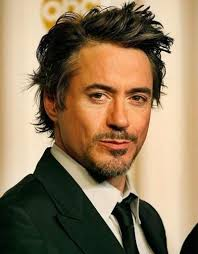

	datasets/people_faces/data/people_faces/6.jpg


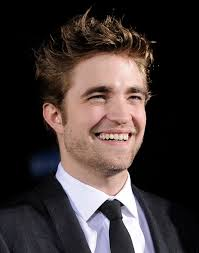

In [5]:
sampling = {'group': '1:5', 'seed': '10'}

api = MLGitAPI()
data_path = api.checkout(entity, tag, sampling)

print_files()

clear_environment()

#### Checkout with range sample

INFO - Metadata Manager: Pull [/api_scripts/multiple_datasets_notebook/.ml-git/datasets/metadata]
INFO - Metadata: Performing checkout on the entity's lastest tag (computer-vision__images__people_faces__2)
blobs: 100%|██████████| 2.00/2.00 [00:00<00:00, 1.28kblobs/s]
chunks: 100%|██████████| 2.00/2.00 [00:00<00:00, 1.37kchunks/s]
files into cache: 100%|██████████| 2.00/2.00 [00:00<00:00, 1.16kfiles into cache/s]
files into workspace: 100%|██████████| 2.00/2.00 [00:00<00:00, 1.13kfiles into workspace/s]


Downloaded files: 
	datasets/people_faces/data/people_faces/6.jpg


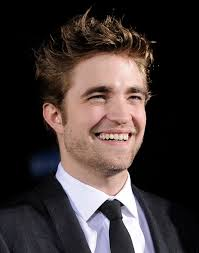

	datasets/people_faces/data/people_faces/2.jpg


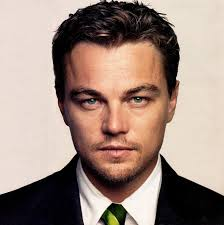

In [6]:
sampling = {'range': '0:4:3'}

data_path = api.checkout(entity, tag, sampling)

print_files()

clear_environment()

#### Checkout with random sample

INFO - Metadata Manager: Pull [/api_scripts/multiple_datasets_notebook/.ml-git/datasets/metadata]
INFO - Metadata: Performing checkout on the entity's lastest tag (computer-vision__images__people_faces__2)
blobs: 100%|██████████| 2.00/2.00 [00:00<00:00, 1.13kblobs/s]
chunks: 100%|██████████| 2.00/2.00 [00:00<00:00, 1.14kchunks/s]
files into cache: 100%|██████████| 2.00/2.00 [00:00<00:00, 1.81kfiles into cache/s]
files into workspace: 100%|██████████| 2.00/2.00 [00:00<00:00, 1.01kfiles into workspace/s]


Downloaded files: 
	datasets/people_faces/data/people_faces/4.jpg


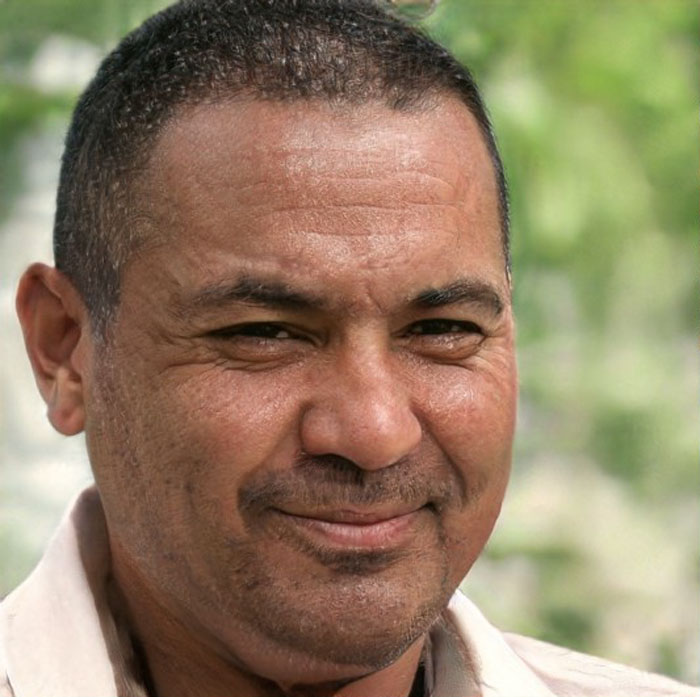

	datasets/people_faces/data/people_faces/5.jpg


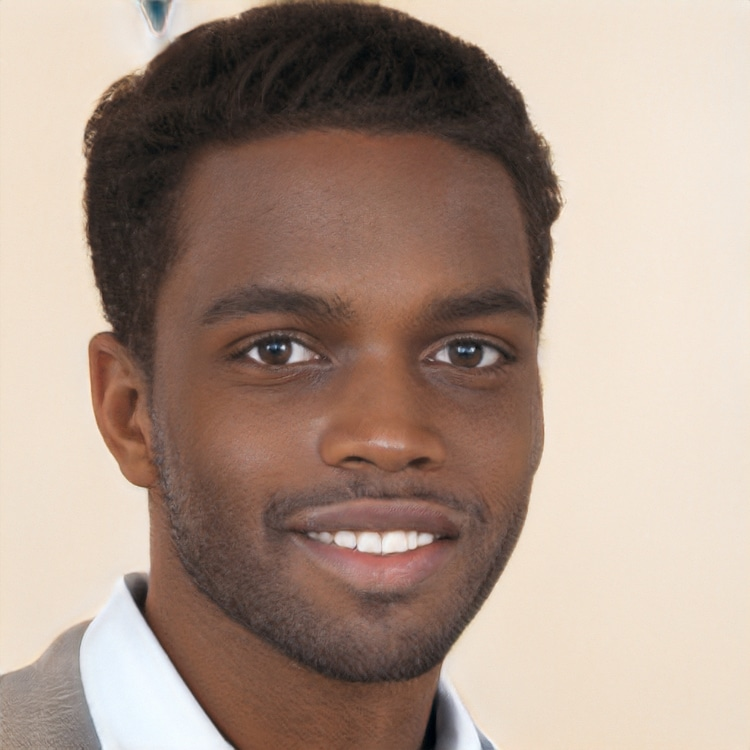

In [7]:
sampling = {'random': '1:5', 'seed': '1'}

data_path = api.checkout(entity, tag, sampling)

print_files()

clear_environment()